# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

Real data üzərində bu dəfəki machine learning modeli Random Forest olacaq. Məqsədim eyni data üzərində fərqli modelləri qurub yekun metrik göstəricilərə əsaslanaraq modeli productiona çıxarmaqdır. 
Hansı modelin nəticələri qənaətbəxş olsa kiçik bir application fason bir şey yazıb modeli oraya inteqrasiya edəcəm. Bu app user tərəfindən daxil edilən maşın məlumatlarına əsasən həmin maşının qiymətini predict etməyə çalışacaq.

## Reading Data

In [2]:
data = pd.read_csv(r'turbo_az_20_pages_full_data.csv')      #dataset yüklənir və dataları oxuyuruq.
data.head()

,Ad,Qiymət,Qısa məlumat,Elan linki,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Yerlərin sayı,Vəziyyəti,Hansı bazar üçün yığılıb,Sahiblər,Qəzalı
0,GWM (Great Wall Motor) WEY 03,51 900 ₼,"2025, 1.5 L, 0 km",https://turbo.az/autos/9439559-gwm-great-wall-...,Bakı,GWM (Great Wall Motor),WEY 03,2025,"Offroader / SUV, 5 qapı",Göy,1.5 L / 383 a.g. / Plug-in Hibrid,0 km,Avtomat (AT),Tam,Bəli,5,"Vuruğu yoxdur, rənglənməyib",NaN,NaN,NaN
1,Changan Uni-Z,35 900 ₼,"2025, 1.5 L, 0 km",https://turbo.az/autos/9548366-changan-uni-z,Bakı,Changan,Uni-Z,2025,"Offroader / SUV, 5 qapı",Ağ,1.5 L / 215 a.g. / Plug-in Hibrid,0 km,Avtomat (Variator),Ön,Bəli,5,"Vuruğu yoxdur, rənglənməyib",Çin,NaN,NaN
2,Haval H6,48 500 ₼,"2025, 1.5 L, 0 km",https://turbo.az/autos/9855988-haval-h6,Bakı,Haval,H6,2025,"Offroader / SUV, 5 qapı",Boz,1.5 L / 243 a.g. / Hibrid,0 km,Avtomat (DHT),Ön,Bəli,5,"Vuruğu yoxdur, rənglənməyib",NaN,NaN,NaN
3,Changan Qiyuan Q07,48 500 ₼,"2025, 1.5 L, 0 km",https://turbo.az/autos/9962861-changan-qiyuan-q07,Bakı,Changan,Qiyuan Q07,2025,"Offroader / SUV, 5 qapı",Qara,1.5 L / 374 a.g. / Plug-in Hibrid,0 km,Avtomat (Variator),Ön,Bəli,5,"Vuruğu yoxdur, rənglənməyib",Çin,0.0,NaN
4,BMW 540,14 950 ₼,"2000, 4.4 L, 300 000 km",https://turbo.az/autos/9490039-bmw-540,Bakı,BMW,540,2000,Sedan,Qara,4.4 L / 286 a.g. / Benzin,300 000 km,Mexaniki (MT),Arxa,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Avropa,2.0,NaN


## Descriptive Stats

In [3]:
data.describe(include='all')                  #descriptive statistikaya baxıb nə edə biləcəyimiz haqqında qısa planlama edirik.

,Ad,Qiymət,Qısa məlumat,Elan linki,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Yerlərin sayı,Vəziyyəti,Hansı bazar üçün yığılıb,Sahiblər,Qəzalı
count,720,720,720,720,720,720,720,720.000000,720,720,720,720,720,720,720,681,720,503,314.000000,2
unique,200,293,356,477,20,48,199,NaN,17,20,247,270,6,3,2,7,4,9,NaN,1
top,Nissan Note,31 800 ₼,"2025, 1.5 L, 0 km",https://turbo.az/autos/9478889-changan-uni-z,Bakı,Changan,Note,NaN,"Offroader / SUV, 5 qapı",Ağ,1.5 L / 215 a.g. / Plug-in Hibrid,0 km,Avtomat (AT),Ön,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Çin,NaN,Bəli
freq,57,17,186,5,624,167,57,NaN,270,216,95,231,312,475,488,601,681,161,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.361111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340764,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.997228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555364,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


## Missing value treatment

In [4]:
for i in data.columns:                           #random forest modellər missing dəyərlərə qarşı həssasdır, ona görə də missing treatment edirik.
    data[i] = data[i].fillna(value=data[i].mode()[0])

## Feature Engineering Steps

In [5]:
#daha clean data üçün bəzi sadə preprocessing mərhələlərini icra edirik.

data[['Mühərrik həcmi(L)', 'Mühərrik gücü(a.g)', 'Mühərrik yanacağı']] = data['Mühərrik'].str.split(' / ', expand=True)

data['Mühərrik həcmi(L)'] = pd.to_numeric(data['Mühərrik həcmi(L)'].str.extract(r"(\d+\.?\d*)")[0], errors="coerce")

data['Mühərrik gücü(a.g)'] = pd.to_numeric(data['Mühərrik gücü(a.g)'].str.extract(r"(\d+)")[0], errors="coerce")


data['Yürüş(km)'] = (                              #km hissəciyini atırıq.
    data['Yürüş']
    .str.replace('km', '', regex=False)
    .str.replace(' ', '', regex=False) )
data['Yürüş(km)'] = pd.to_numeric(data['Yürüş(km)'], errors='coerce')


data['Qiymət(azn)'] = (                           #₼ simvolunu atırıq.
    data['Qiymət']
    .str.replace('₼', '', regex=False)
    .str.replace(' ', '', regex=False) )
data['Qiymət(azn)'] = pd.to_numeric(data['Qiymət(azn)'], errors='coerce')

data['Yerlərin sayı'] = (data['Yerlərin sayı'].replace('8+', 8).astype(int))

## Variable of interest

In [6]:
data.drop(['Ad','Qısa məlumat','Elan linki','Mühərrik','Sahiblər','Qəzalı','Yürüş','Qiymət'], axis=1, inplace=True)

In [7]:
data.dropna(axis=0, inplace=True)    #null value-lar saxlamamalıyıq.

In [8]:
data.isnull().sum()  

Şəhər                       0
Marka                       0
Model                       0
Buraxılış ili               0
Ban növü                    0
Rəng                        0
Sürətlər qutusu             0
Ötürücü                     0
Yeni                        0
Yerlərin sayı               0
Vəziyyəti                   0
Hansı bazar üçün yığılıb    0
Mühərrik həcmi(L)           0
Mühərrik gücü(a.g)          0
Mühərrik yanacağı           0
Yürüş(km)                   0
Qiymət(azn)                 0
dtype: int64

In [9]:
data.corr(method='spearman', numeric_only=True)['Qiymət(azn)']     #numeric featurelərin targetlə korelyasiyasına baxaq.

Buraxılış ili         0.670782
Yerlərin sayı         0.126413
Mühərrik həcmi(L)     0.130977
Mühərrik gücü(a.g)    0.743499
Yürüş(km)            -0.550102
Qiymət(azn)           1.000000
Name: Qiymət(azn), dtype: float64

## Conversions

Bu step-də bütün categorical feature-ləri (object tipli) LabelEncoder ilə ədədi dəyərlərə çevirəcəm ki, model onlarla işləyə bilsin.

In [10]:
for i in data.columns:
    if data[i].dtypes==object:
        print(i)

Şəhər
Marka
Model
Ban növü
Rəng
Sürətlər qutusu
Ötürücü
Yeni
Vəziyyəti
Hansı bazar üçün yığılıb
Mühərrik yanacağı


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    if data[i].dtypes==object:
        data[i] = le.fit_transform(data[i])




data.head()

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Yeni,Yerlərin sayı,Vəziyyəti,Hansı bazar üçün yığılıb,Mühərrik həcmi(L),Mühərrik gücü(a.g),Mühərrik yanacağı,Yürüş(km),Qiymət(azn)
0,0,14,178,2025,11,5,0,1,0,5,3,8,1.5,383.0,3,0,51900
1,0,5,169,2025,11,1,4,2,0,5,3,8,1.5,215.0,3,0,35900
2,0,17,92,2025,11,3,1,2,0,5,3,8,1.5,243.0,2,0,48500
3,0,5,138,2025,11,9,4,2,0,5,3,8,1.5,374.0,3,0,48500
4,0,1,22,2000,14,9,5,0,1,5,3,1,4.4,286.0,0,300000,14950


Bu hissəyə qədər qısa məlumat:
1. Outlier treatment mərhələsi icra edilmir, çünki Random Forest modeli çoxsaylı qərar ağaclarından ibarətdir və outlier dəyərlər yalnız 
bu ağacların kiçik bir hissəsinə təsir edir. Yekun proqnoz isə bütün ağacların nəticələrinin orta hesabla balanslaşdırılması yolu ilə əldə olunur.
2. Korelyasiya treatment mərhələsi icra edilməmişdir, çünki Random Forest modeli hər bir bölünmədə (node-da) təsadüfi seçilmiş feature alt dəstlərindən istifadə edir. Bu səbəbdən yüksək korelyasiyalı dəyişənlər model daxilində eyni anda dominant rol oynamır və model multikollinearlıq problemindən əziyyət çəkmir.
3. Random Forest üçün feature distribution-larına uyğun transformasiya tələb olunmadığından, əlavə distribution treatment icra etmədim.


# Target and Inputs

In [12]:
y = data['Qiymət(azn)']
x = data.drop('Qiymət(azn)', axis = 1)

# Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
#evaluate funksiyasını bu part-da create edib, kodun gələcək hissələrində bir neçə dəfə təkrar istifadə edəcəm.

def evaluate(model,X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    return results_df

# Modeling Parts

Bu hissədə Random Forest-in sıra ilə: default model, importance features model, optimized modellərini qurmağa çalışacam.

## Default model

In [15]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
evaluate(reg, X_train, y_train, X_test, y_test)    #default qurulan modelin metrikləri belədir:

,Metric,Train,Test
0,MAE,2.253653e+03,4.780763e+03
1,MSE,4.405431e+07,1.153644e+08
2,RMSE,6.637342e+03,1.074078e+04
3,R2,9.745627e+01,7.572167e+01


##  Feature Importance of Default Model

In [17]:
def plot_feature_importances(model, feature_names):
    
    importances = model.feature_importances_                 #bu funksiya hər bir feature-nin targeti praqnozlaşdırmada 
                                                            #nə qədər əhəmiyyətli olduğunu göstərəcək və biz də sonra ən əhəmiyyətli olanları
    importance_df = pd.DataFrame({                          #seçib o feature-lərlə default modeli yenidən quracağıq.
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
   
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis() 
    plt.show()
    
    return importance_df

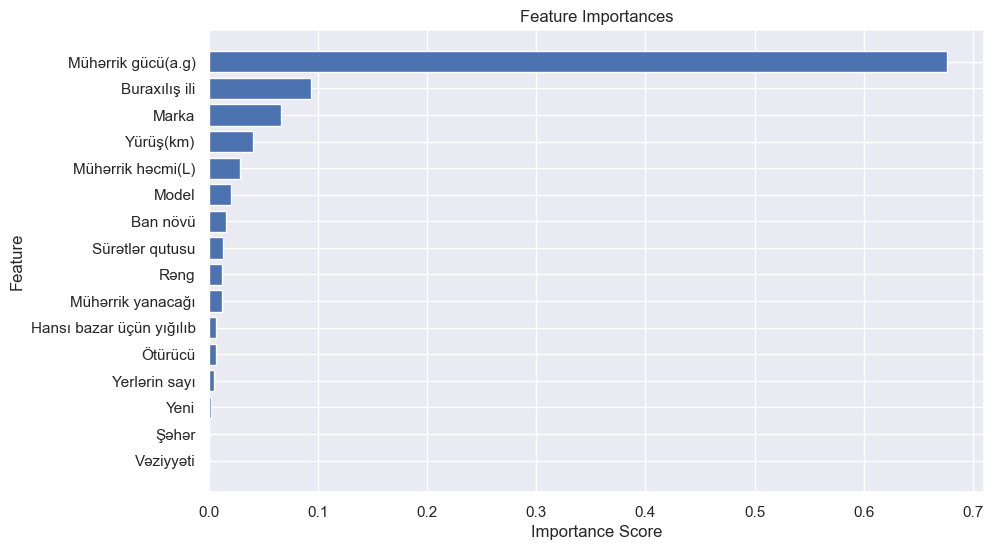

,Feature,Importance
13,Mühərrik gücü(a.g),0.676154
3,Buraxılış ili,0.093274
1,Marka,0.066171
15,Yürüş(km),0.040835
12,Mühərrik həcmi(L),0.028761
2,Model,0.020816
4,Ban növü,0.015557
6,Sürətlər qutusu,0.012985
5,Rəng,0.012524
14,Mühərrik yanacağı,0.012516


In [18]:
feature_names = X_train.columns

feature_importance_df = plot_feature_importances(reg, feature_names)

feature_importance_df

In [19]:
feature_importance_df.Feature.tolist()    #əhəmiyyətliliyi 1%-dən aşağı olanları seçməyəcəyik.

['Mühərrik gücü(a.g)',
 'Buraxılış ili',
 'Marka',
 'Yürüş(km)',
 'Mühərrik həcmi(L)',
 'Model',
 'Ban növü',
 'Sürətlər qutusu',
 'Rəng',
 'Mühərrik yanacağı',
 'Hansı bazar üçün yığılıb',
 'Ötürücü',
 'Yerlərin sayı',
 'Yeni',
 'Şəhər',
 'Vəziyyəti']

In [20]:
reg_selected = RandomForestRegressor(random_state=42)     #bu feature-ləri seçirəm.

selected_features = ['Mühərrik gücü(a.g)', 'Buraxılış ili', 'Marka', 'Yürüş(km)', 'Mühərrik həcmi(L)', 'Model',
                     'Ban növü', 'Sürətlər qutusu', 'Rəng', 'Mühərrik yanacağı']

reg_selected.fit(X_train[selected_features],y_train)      #seçilmiş feature-lərlə modeli öyrədirəm.

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
#öyrənmiş modelin metrik göstəricilərinə baxıram

evaluate(reg_selected,X_train[selected_features] ,y_train, X_test[selected_features], y_test)  

,Metric,Train,Test
0,MAE,2.267942e+03,4.777793e+03
1,MSE,4.545821e+07,1.131329e+08
2,RMSE,6.742270e+03,1.063639e+04
3,R2,9.737520e+01,7.619128e+01


## Optimized model

In [22]:
#bu part-da random forest-in optimized edilmiş versiyası üçün hyperparametrlərin aralıqlarını təyin edirik. 
#tez bir vaxt-da daha yaxşı nəticə almaq üçün çalışacam.

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]   # daha çox ağac
max_depth = [int(x) for x in np.linspace(10, 150, num=15)]                  # daha dərin ağaclar
max_features = ['sqrt', 'log2', 0.3, 0.5, None]                             # fərqli seçimlər
min_samples_split = [2, 5, 10, 20, 50]                                      # kiçik dəyərlər ilə daha dəqiq bölmə
min_samples_leaf = [1, 2, 4, 5, 8, 10]                                      # kiçik yapraq ölçüləri
bootstrap = [True, False]                                                   # bootstrap istifadəsi

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [23]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(X_train[selected_features], y_train)            # Fit the random search model

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [24]:
rf_random.best_params_           #ən yaxşı nəticəni bu parametrlərlə aldığı üçün, aşağıda bu parametrlərlə modeli fit edirəm.

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 110,
 'bootstrap': False}

In [25]:
optimized_model = rf_random.best_estimator_

evaluate(optimized_model, X_train[selected_features],y_train, X_test[selected_features], y_test)

,Metric,Train,Test
0,MAE,1.177855e+03,3.844823e+03
1,MSE,8.402215e+06,5.043792e+07
2,RMSE,2.898657e+03,7.101966e+03
3,R2,9.951485e+01,8.938539e+01


Bu modellər arasında ən yaxşı nəticə OPTIMIZED MODEL-in nəticələridir. Ona görə də production-a bu model ilə çıxacam.

# Production

turbo_az_10_pages_full_data.csv datası üzərində modelin predict etdiyi qiymətləri test edək.

In [26]:
dep_data = pd.read_csv(r'turbo_az_10_pages_full_data.csv')
dep_data.head()


,Ad,Qiymət,Qısa məlumat,Elan linki,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Yerlərin sayı,Vəziyyəti,Hansı bazar üçün yığılıb,Sahiblər,Qəzalı
0,DongFeng Aeolus Shine GS,33 900 ₼,"2024, 1.5 L, 0 km",https://turbo.az/autos/8561638-dongfeng-aeolus...,Bakı,DongFeng,Aeolus Shine GS,2024,"Offroader / SUV, 5 qapı",Göy,1.5 L / 190 a.g. / Benzin,0 km,Avtomat (AT),Ön,Bəli,5,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN
1,Lynk & Co 900,104 900 ₼,"2025, 1.5 L, 0 km",https://turbo.az/autos/9456333-lynk-co-900,Bakı,Lynk & Co,900,2025,"Offroader / SUV, 5 qapı",Göy,1.5 L / 721 a.g. / Plug-in Hibrid,0 km,Avtomat (Reduktor),Tam,Bəli,6,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN
2,Maserati Grecale 300,135 949 ₼,"2025, 2.0 L, 0 km",https://turbo.az/autos/9631061-maserati-grecal...,Bakı,Maserati,Grecale 300,2025,"Offroader / SUV, 5 qapı",Boz,2.0 L / 300 a.g. / Benzin,0 km,Avtomat (AT),Tam,Bəli,5,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN
3,Lynk & Co 900,107 900 ₼,"2025, 2.0 L, 0 km",https://turbo.az/autos/9984057-lynk-co-900,Bakı,Lynk & Co,900,2025,"Offroader / SUV, 5 qapı",Qara,2.0 L / 734 a.g. / Plug-in Hibrid,0 km,Avtomat (AT),Tam,Bəli,6,"Vuruğu yoxdur, rənglənməyib",Çin,NaN,NaN
4,BMW 540,14 950 ₼,"2000, 4.4 L, 300 000 km",https://turbo.az/autos/9490039-bmw-540,Bakı,BMW,540,2000,Sedan,Qara,4.4 L / 286 a.g. / Benzin,300 000 km,Mexaniki (MT),Arxa,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Avropa,2.0,NaN


In [27]:
for i in dep_data.columns:                           
    dep_data[i] = dep_data[i].fillna(value=dep_data[i].mode()[0])


dep_data[['Mühərrik həcmi(L)', 'Mühərrik gücü(a.g)', 'Mühərrik yanacağı']] = dep_data['Mühərrik'].str.split(' / ', expand=True)

dep_data['Mühərrik həcmi(L)'] = pd.to_numeric(dep_data['Mühərrik həcmi(L)'].str.extract(r"(\d+\.?\d*)")[0], errors="coerce")

dep_data['Mühərrik gücü(a.g)'] = pd.to_numeric(dep_data['Mühərrik gücü(a.g)'].str.extract(r"(\d+)")[0], errors="coerce")


dep_data['Yürüş(km)'] = (                              #km hissəciyini atırıq.
    dep_data['Yürüş']
    .str.replace('km', '', regex=False)
    .str.replace(' ', '', regex=False) )
dep_data['Yürüş(km)'] = pd.to_numeric(dep_data['Yürüş(km)'], errors='coerce')


dep_data['Qiymət(azn)'] = (                           #₼ simvolunu atırıq.
    dep_data['Qiymət']
    .str.replace('₼', '', regex=False)
    .str.replace(' ', '', regex=False) )
dep_data['Qiymət(azn)'] = pd.to_numeric(dep_data['Qiymət(azn)'], errors='coerce')

dep_data['Yerlərin sayı'] = (dep_data['Yerlərin sayı'].replace('8+', 8).astype(int))

dep_data.drop(['Ad','Qısa məlumat','Elan linki','Mühərrik','Sahiblər','Qəzalı','Yürüş','Qiymət'], axis=1, inplace=True)

dep_data.dropna(axis=0, inplace=True) 

real_data = dep_data.copy()

In [28]:
for i in dep_data.columns:
    if dep_data[i].dtypes==object:
        dep_data[i] = le.fit_transform(dep_data[i])

dep_data.head()

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Yeni,Yerlərin sayı,Vəziyyəti,Hansı bazar üçün yığılıb,Mühərrik həcmi(L),Mühərrik gücü(a.g),Mühərrik yanacağı,Yürüş(km),Qiymət(azn)
0,0,7,14,2024,8,2,0,2,0,5,2,6,1.5,190.0,0,0,33900
1,0,22,12,2025,8,2,1,1,0,6,2,6,1.5,721.0,3,0,104900
2,0,23,43,2025,8,1,0,1,0,5,2,6,2.0,300.0,0,0,135949
3,0,22,12,2025,8,5,0,1,0,6,2,8,2.0,734.0,3,0,107900
4,0,0,10,2000,11,5,4,0,1,5,2,1,4.4,286.0,0,300000,14950


In [29]:
predicted_price = optimized_model.predict(dep_data[selected_features])

real_data['Predicted_Price'] = predicted_price

real_data.sample(10)

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Yeni,Yerlərin sayı,Vəziyyəti,Hansı bazar üçün yığılıb,Mühərrik həcmi(L),Mühərrik gücü(a.g),Mühərrik yanacağı,Yürüş(km),Qiymət(azn),Predicted_Price
93,Tovuz,Toyota,Land Cruiser Prado,2005,"Offroader / SUV, 5 qapı",Gümüşü,Avtomat (AT),Tam,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Koreya,2.7,163.0,Benzin,381256,23000,19031.574917
6,Bakı,Hyundai,Elantra,2016,Sedan,Gümüşü,Avtomat (AT),Ön,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Amerika,2.0,150.0,Benzin,148000,21900,23413.395667
19,Bakı,Land Rover,Range Rover,2016,"Offroader / SUV, 5 qapı",Ağ,Avtomat (AT),Tam,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Amerika,3.0,258.0,Dizel,168500,67490,37014.338625
52,Bakı,Mercedes,V 220,2014,Minivan,Ağ,Avtomat (AT),Arxa,Xeyr,7,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,2.1,163.0,Dizel,192500,48960,27432.214583
51,Bakı,Chevrolet,Cobalt,2024,Sedan,Ağ,Avtomat (AT),Ön,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Avropa,1.5,106.0,Benzin,78000,26592,38398.348792
41,Bakı,Hyundai,Accent,2018,Sedan,Mavi,Avtomat (AT),Ön,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Koreya,1.4,100.0,Benzin,27500,20100,23308.829125
54,Bakı,Hyundai,Avante,2015,Sedan,Ağ,Avtomat (AT),Ön,Xeyr,5,"Vuruğu yoxdur, rənglənib",Koreya,1.6,136.0,Dizel,136000,20700,21616.344208
81,Bakı,Mercedes,Sprinter 316,2014,Mikroavtobus,Ağ,Mexaniki (MT),Arxa,Xeyr,8,"Vuruğu yoxdur, rənglənib",Avropa,2.7,150.0,Dizel,285000,59000,29270.864375
101,Bakı,Ford,Transit,2011,Yük maşını,Qırmızı,Mexaniki (MT),Arxa,Xeyr,3,"Vuruğu yoxdur, rənglənməyib",Avropa,2.4,140.0,Dizel,172000,35400,21963.087208
107,Bakı,Ford,Transit,2011,Yük maşını,Ağ,Mexaniki (MT),Arxa,Xeyr,3,"Vuruğu yoxdur, rənglənməyib",Avropa,2.4,115.0,Dizel,102000,38400,23284.379417
